In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Gas Turbines

In [4]:
data=pd.read_csv('gas_turbines.csv')
print(data.shape)
data.head(5)

(15039, 11)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [6]:
data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [7]:
data['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
144.49      1
122.83      1
146.05      1
113.91      1
130.43      1
Name: TEY, Length: 4207, dtype: int64

In [8]:
data.columns.transpose()

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

## Bar Chart with Given dataset

In [9]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

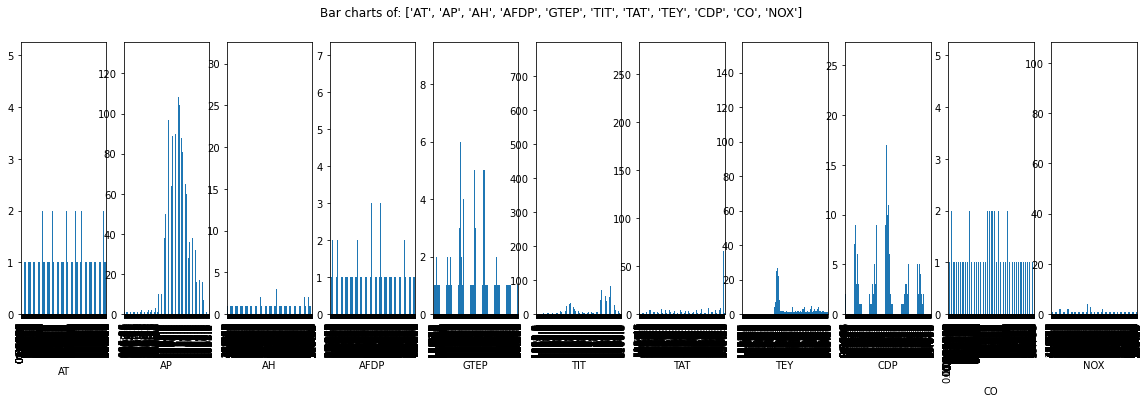

In [10]:
PlotBarCharts(inpData=data, 
              colsToPlot=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'])

## Histogram for the given dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BCA5A2BB80>,
      dtype=object)

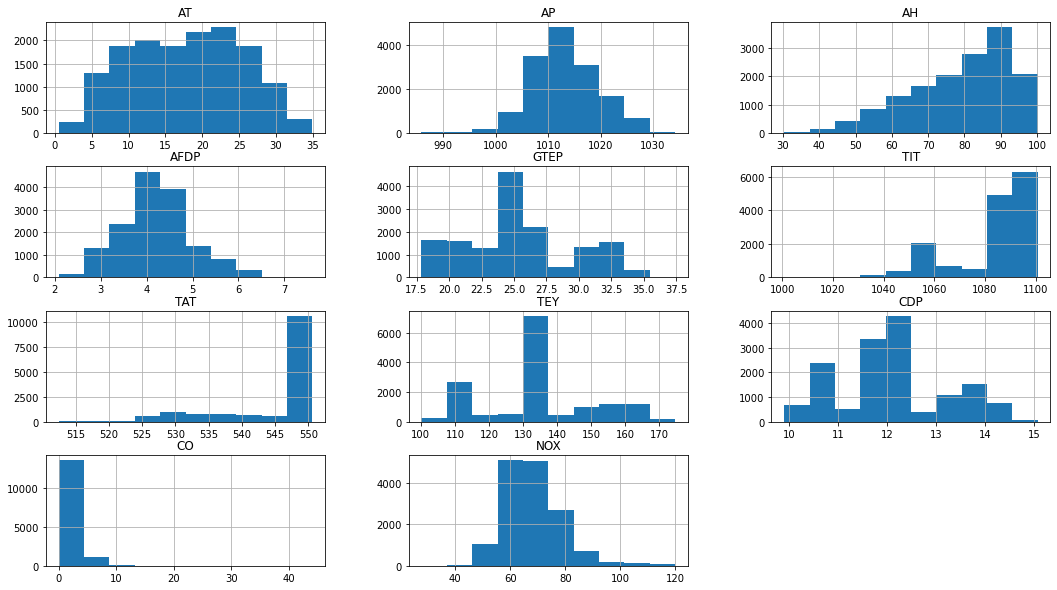

In [11]:
data.hist(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'], figsize=(18,10))

In [12]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

## Finding Correlation using ANOVA

In [14]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [51]:
ContinuousVariables=ContinuousColsList
FunctionAnova(inpData=data, TargetVariable='TEY', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

AT is correlated with TEY | P-Value: 0.0
AP is correlated with TEY | P-Value: 1.1112664214571114e-69
AH is correlated with TEY | P-Value: 1.473842790763612e-74
AFDP is correlated with TEY | P-Value: 0.0
GTEP is correlated with TEY | P-Value: 0.0
TIT is correlated with TEY | P-Value: 0.0
TAT is correlated with TEY | P-Value: 0.0
CDP is correlated with TEY | P-Value: 0.0
CO is correlated with TEY | P-Value: 0.0
NOX is correlated with TEY | P-Value: 2.305112222723662e-178


['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']

## Defining X and Y

In [52]:
X = data.drop('TEY',axis=1)
y = data['TEY']

In [53]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [54]:
y.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

## Splitting data to training and testing dataset

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## Standarization of data

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from numpy.random import seed
import tensorflow 
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from tensorflow.keras.layers.experimental import preprocessing

In [80]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tensorflow.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[-1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [81]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10527, 10)
(10527,)
(4512, 10)
(4512,)


## Model Creation

In [82]:
model = create_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


## Training The Model

In [83]:
model.compile(
    optimizer=tensorflow.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [85]:
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 6/100
264/264 [==============================] - 0s 998us/step - loss: 133.1514 - val_loss: 133.5386
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 8/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1513 - val_loss: 133.5386
Epoch 9/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1513 - val_loss: 133.5386
Epoch 10/100
264/264 [==============================]

264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 79/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1513 - val_loss: 133.5386
Epoch 80/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 81/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 82/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 83/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 84/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 85/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 86/100
264/264 [==============================] - 0s 1ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 87/100
264/264 [==============================] - 0s 

In [86]:
test = model.fit(X_test, y_test, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [93]:
training_df = pd.DataFrame(training.history)
print(training_df.head())

         loss   val_loss
0  133.151352  133.53862
1  133.151398  133.53862
2  133.151398  133.53862
3  133.151398  133.53862
4  133.151428  133.53862


In [94]:
test_df = pd.DataFrame(test.history)
print(test_df.head())

         loss    val_loss
0  133.159958  132.831589
1  133.159943  132.831589
2  133.160004  132.831589
3  133.159988  132.831589
4  133.160019  132.831589
